In [36]:
import 기상청날씨정보 as wt
import 서울시지하철승하차현황_API as sw    # 가상환경 lib에 등록된 모듈이 우선 연결
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_family = font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
plt.rc('font', family=font_family)

In [3]:
df1=wt.main()    # 날씨정보
df2=sw.main_api("20210101","20210630")   # 지하철 승하차현황

시작일을 입력하세요.(예:20210401)20210101
종료일을 입력하세요.(예:20210401)20210630
검색할 지점명을 입력하세요.서울
저장되었습니다.


In [11]:
print(df1.head())
print(df2.head())

  지점명          날짜  평균기온  최저기온  최고기온 일강수량
0  서울  2021-01-01  -4.2  -9.8   1.6    0
1  서울  2021-01-02  -5.0  -8.4  -1.4    0
2  서울  2021-01-03  -5.6  -9.1  -2.0    0
3  서울  2021-01-04  -3.5  -8.4   0.3  0.0
4  서울  2021-01-05  -5.5  -9.9  -2.1  0.0
        사용일   라인    역명    승차    하차
0  20210101  1호선   서울역  9260  9858
1  20210101  1호선   동묘앞  4153  4491
2  20210101  1호선    시청  2906  2654
3  20210101  1호선    종각  5637  4936
4  20210101  1호선  종로3가  5502  4910


#### 작업하세요.
- df1:날짜, df2:사용일 => 날짜형 데이터로 변경
- df1:평균기온/최저기온/최고기온/일강수량 => 실수형
- df2:승차/하차 => 정수형

In [15]:
df1['날짜']=pd.to_datetime(df1['날짜'])
df1=df1.astype({'평균기온':'float64','최저기온':'float64','최고기온':'float64','일강수량':'float64'})
#print(df1.info())
df2['사용일']=pd.to_datetime(df2['사용일'])
df2=df2.astype({'승차':'int64','하차':'int64'})
df2=df2.rename(columns={df2.columns[0]:'날짜'})
#print(df2.info())

### 특정 역 조회시 해당 역의 날짜별 일강수량에 따른 승차인원 변화 확인
- 시게열 차트(강수량/승차인원)
- 산점도

In [31]:
scLine="시청"  #input('조회할 역 이름 입력')

df3=df2[df2['역명']==scLine].groupby('날짜').sum()
df3=df3.reset_index()
df3=pd.merge(df3[['날짜','승차']], df1[['날짜', '일강수량']], on='날짜')

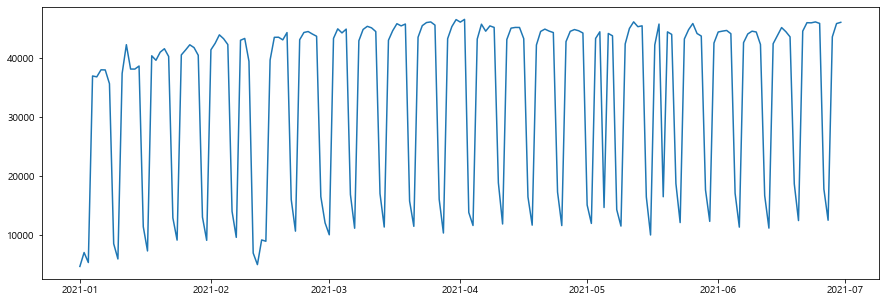

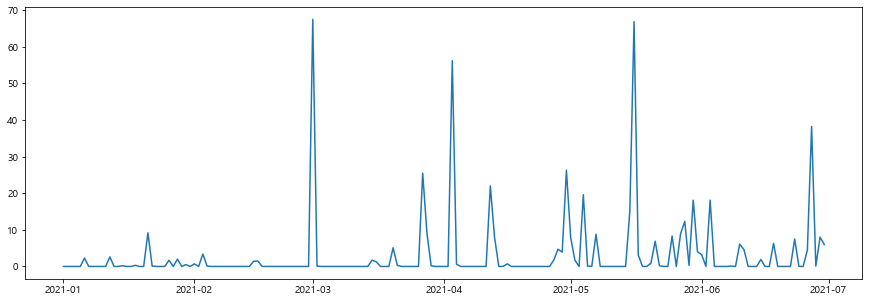

In [32]:
# 데이터 전체 출력

plt.figure(figsize=(15,5))
plt.plot(df3['날짜'], df3['승차'])
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df3['날짜'], df3['일강수량'])
plt.show()

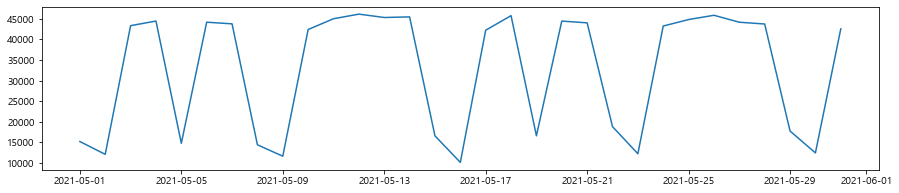

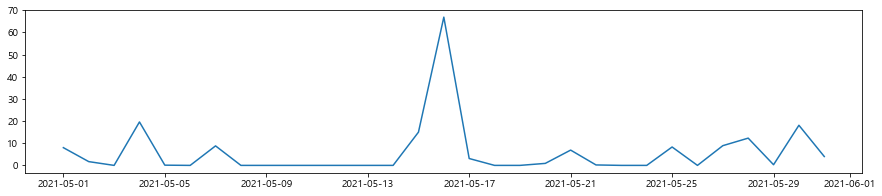

In [34]:
# 특정 기간별 출력

df3=df3[(df3['날짜']>="20210501")&(df3['날짜']<="20210531")]

plt.figure(figsize=(15,3))
plt.plot(df3['날짜'], df3['승차'])
plt.show()

plt.figure(figsize=(15,3))
plt.plot(df3['날짜'], df3['일강수량'])
plt.show()

### 일강수량에 따른 승차인원 관계(산점도)

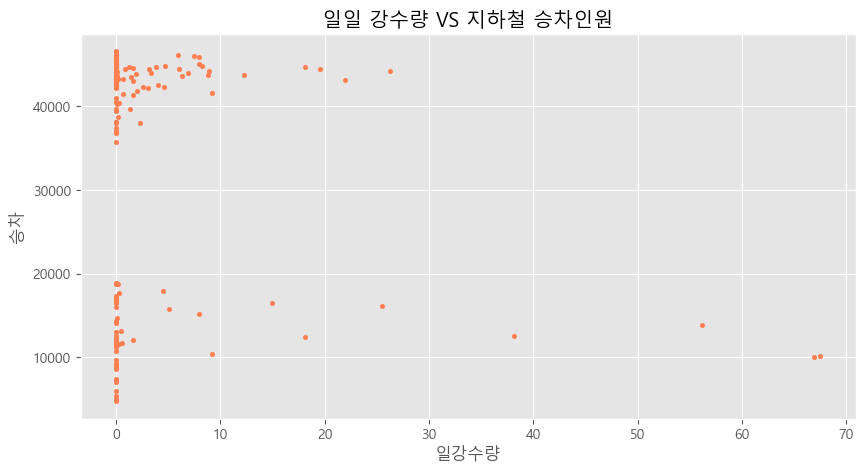

In [42]:
scLine="시청"  #input('조회할 역 이름 입력')

df3=df2[df2['역명']==scLine].groupby('날짜').sum()
df3=df3.reset_index()
df3=pd.merge(df3[['날짜','승차']], df1[['날짜', '일강수량']], on='날짜')

plt.style.use('ggplot')
df3.plot(kind="scatter", x='일강수량', y='승차', c='coral', s=10, figsize=(10, 5))
plt.title('일일 강수량 VS 지하철 승차인원')
plt.show()